In [ ]:
import numpy as np
import pandas as pd
import os
from zipfile import*
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import cv2
from numpy import *

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,MaxPooling2D,Convolution2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
%matplotlib inline
import os

import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 with zipfile.ZipFile('/content/drive/MyDrive/data2.zip') as zip_ref:
    zip_ref.extractall()


In [ ]:
import os
from PIL import Image
from IPython.display import display

def display_images(folder_path, num_images=5):
    # Get a list of all files in the folder
    all_files = os.listdir(folder_path)

    # Filter only image files (you can extend this list if needed)
    image_files = [file for file in all_files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # Display the first 5 images
    for i in range(min(num_images, len(image_files))):
        image_path = os.path.join(folder_path, image_files[i])
        img = Image.open(image_path)
        display(img)

# Replace 'your_folder_path' with the path to your folder containing images
folder_path = '/content/data2'
display_images(folder_path)


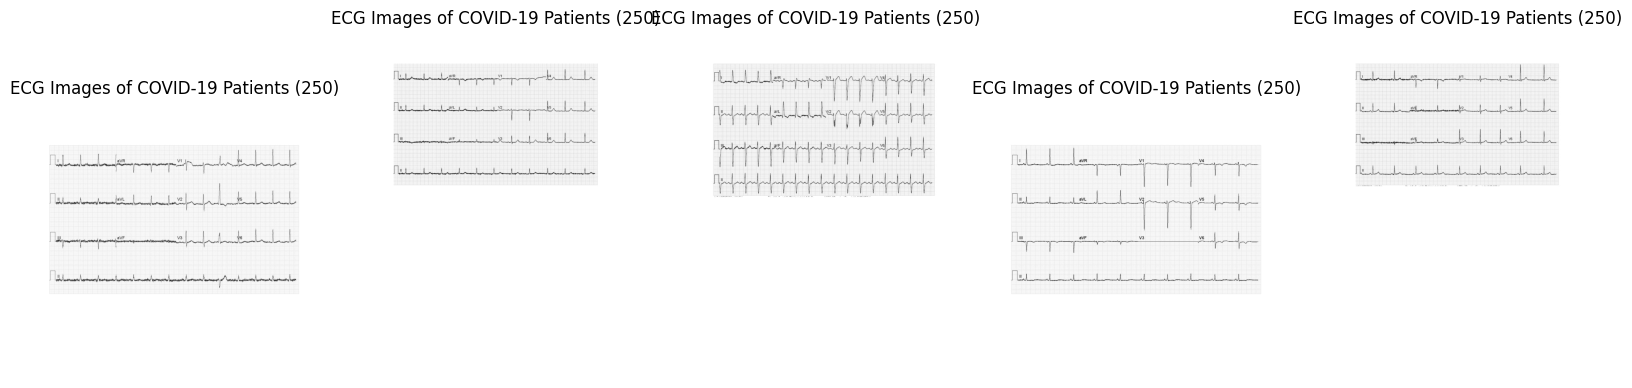

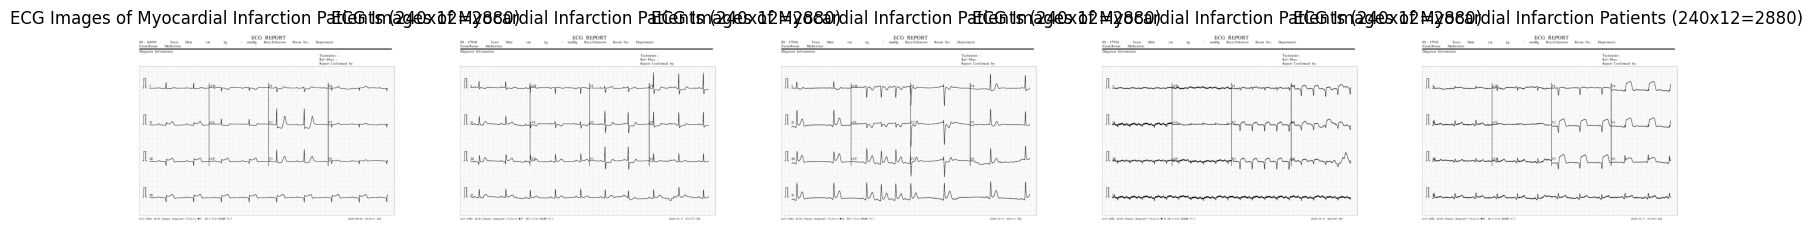

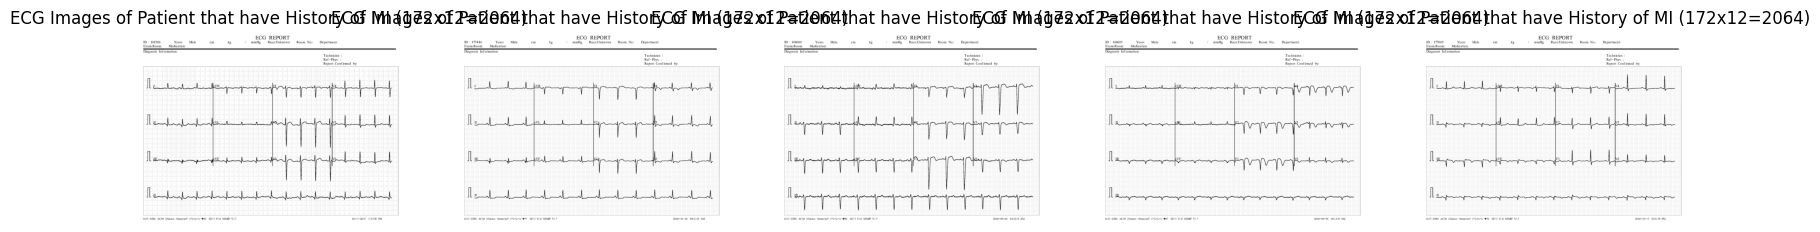

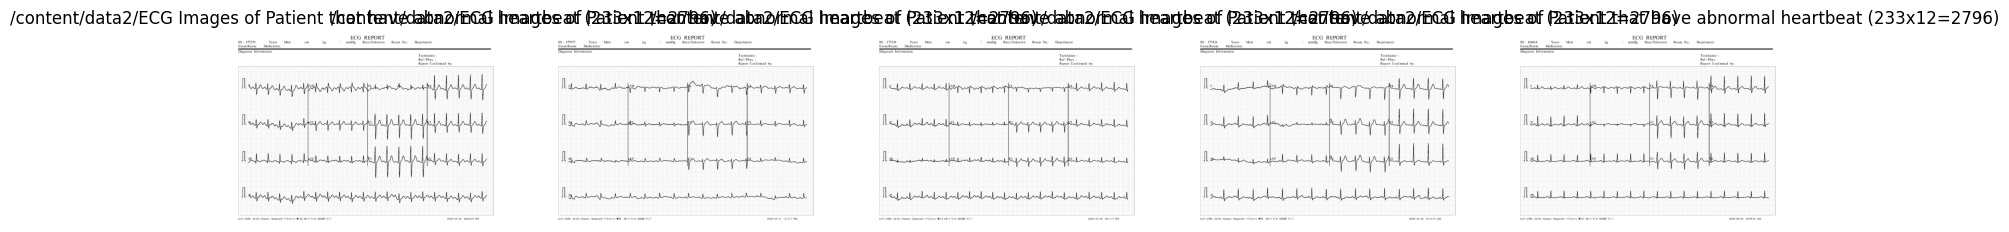

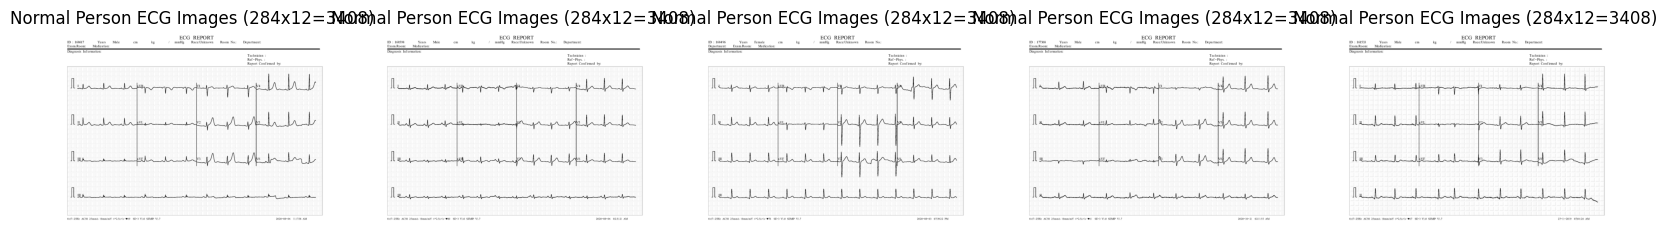

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

DATADIR ='/content/data2'
CATEGORIES = [
    "ECG Images of COVID-19 Patients (250)",
    "ECG Images of Myocardial Infarction Patients (240x12=2880)",
    "ECG Images of Patient that have History of MI (172x12=2064)",
    "/content/data2/ECG Images of Patient that have abnormal heartbeat (233x12=2796)",
    "Normal Person ECG Images (284x12=3408)"
]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    images_to_display = 5

    plt.figure(figsize=(20, 10))  # Adjust the figure size as needed

    for i, img in enumerate(os.listdir(path)[:images_to_display]):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, 5, i + 1)  # 2 rows, 5 columns
        plt.imshow(img_array, cmap='gray')
        plt.title(category)
        plt.axis('off')  # Turn off axis labels
    plt.show()


In [ ]:
import os

path = '/content/data2/ECG Images of COVID-19 Patients (250)'

# List all files in the directory
files = os.listdir(path)

# Filter files with a specific image extension, e.g., ".jpg"
image_files = [file for file in files if file.lower().endswith((".jpg", ".png", ".jpeg"))]

# Print the number of images
print(f"Number of images: {len(image_files)}")

Number of images: 250


In [ ]:
import os

path = '/content/data2/ECG Images of Myocardial Infarction Patients (240x12=2880)'

# List all files in the directory
files = os.listdir(path)

# Filter files with a specific image extension, e.g., ".jpg"
image_files = [file for file in files if file.lower().endswith((".jpg", ".png", ".jpeg"))]

# Print the number of images
print(f"Number of images: {len(image_files)}")

Number of images: 239


In [ ]:
import os

path = '/content/data2/ECG Images of Patient that have History of MI (172x12=2064)'

# List all files in the directory
files = os.listdir(path)

# Filter files with a specific image extension, e.g., ".jpg"
image_files = [file for file in files if file.lower().endswith((".jpg", ".png", ".jpeg"))]

# Print the number of images
print(f"Number of images: {len(image_files)}")

Number of images: 172


In [ ]:
import os

path = '/content/data2/ECG Images of Patient that have abnormal heartbeat (233x12=2796)'

# List all files in the directory
files = os.listdir(path)

# Filter files with a specific image extension, e.g., ".jpg"
image_files = [file for file in files if file.lower().endswith((".jpg", ".png", ".jpeg"))]

# Print the number of images
print(f"Number of images: {len(image_files)}")

Number of images: 233


In [ ]:
import os

path = '/content/data2/Normal Person ECG Images (284x12=3408)'

# List all files in the directory
files = os.listdir(path)

# Filter files with a specific image extension, e.g., ".jpg"
image_files = [file for file in files if file.lower().endswith((".jpg", ".png", ".jpeg"))]

# Print the number of images
print(f"Number of images: {len(image_files)}")

Number of images: 284


In [ ]:
import cv2
import os

def process_image(input_directory, output_directory, target_size=(1000, 1000)):
    os.makedirs(output_directory, exist_ok=True)

    for filename in os.listdir(input_directory):
        if filename.endswith((".jpg", ".jpeg", ".png")):
            input_image_path = os.path.join(input_directory, filename)
            output_image_path = os.path.join(output_directory, f"processed_{filename}")

            # Read the input image in grayscale
            img = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

            # Resize the image
            img_resized = cv2.resize(img, target_size)

            # Normalize the image
            #img_normalized = img_resized / 255.0  # Scale pixel values to the range [0, 1]

            # Apply bilateral filtering
            bilateral_blur = cv2.bilateralFilter(img_resized, d=9, sigmaColor=75, sigmaSpace=75)

            # Convert the image to 8-bit unsigned integer
            img_uint8 = bilateral_blur.astype('uint8')

            # Save the processed image
            cv2.imwrite(output_image_path, img_uint8)

            print(f"Processed image saved to: {output_image_path}")

# Input and output directories
base_path = '/content/data2/ECG Images of COVID-19 Patients (250)'
new_base_path = "/content/drive/MyDrive/covid_19_clean"  # Corrected the output directory

# Target size for resizing
target_size = (1000, 1000)

# Process images with resizing, normalization, and bilateral blur
process_image(base_path, new_base_path, target_size)


Processed image saved to: /content/drive/MyDrive/covid_19_clean/processed_Binder1_Page_116.jpg
Processed image saved to: /content/drive/MyDrive/covid_19_clean/processed_Binder1_Page_058.jpg
Processed image saved to: /content/drive/MyDrive/covid_19_clean/processed_Binder1_Page_001.jpg
Processed image saved to: /content/drive/MyDrive/covid_19_clean/processed_Binder1_Page_097.jpg
Processed image saved to: /content/drive/MyDrive/covid_19_clean/processed_Binder1_Page_034.jpg
Processed image saved to: /content/drive/MyDrive/covid_19_clean/processed_Binder1_Page_138.jpg
Processed image saved to: /content/drive/MyDrive/covid_19_clean/processed_Binder1_Page_171.jpg
Processed image saved to: /content/drive/MyDrive/covid_19_clean/processed_Binder1_Page_115.jpg
Processed image saved to: /content/drive/MyDrive/covid_19_clean/processed_Binder1_Page_105.jpg
Processed image saved to: /content/drive/MyDrive/covid_19_clean/processed_Binder1_Page_179.jpg
Processed image saved to: /content/drive/MyDrive/c

In [ ]:
import cv2
import numpy as np
import os

# Function to process an image and save the results
def process_and_save(input_path, output_folder):
    # Load the image
    img = cv2.imread(input_path)

    # Check if the image is successfully loaded
    if img is None:
        print(f"Error: Image not loaded. Check the file path: {input_path}")
        return

    # Convert the color space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Define the lower and upper white color thresholds
    lower_white = np.array([200, 200, 200], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask based on the white color thresholds
    mask = cv2.inRange(img, lower_white, upper_white)

    # Perform morphological operations on the mask
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

    # Invert the mask
    mask = cv2.bitwise_not(mask)

    # Create a background with white color
    bk = np.full(img.shape, 255 ,dtype=np.uint8)

    # Apply the mask to the original image
    fg_masked = cv2.bitwise_and(img, img, mask=mask)

    # Invert the mask again
    mask = cv2.bitwise_not(mask)

    # Apply the inverted mask to the background
    bk_masked = cv2.bitwise_and(bk, bk, mask=mask)

    # Combine the masked foreground and background
    final = cv2.bitwise_or(fg_masked, bk_masked)

    # Invert the mask one more time
    mask = cv2.bitwise_not(mask)

    # Specify the output file path for saving
    output_path = os.path.join(output_folder, os.path.basename(input_path))

    # Save the final image in the output folder
    cv2.imwrite(output_path, final)

# Input folder path
input_folder = "/content/drive/MyDrive/covid_19_clean"

# Output folder path
output_folder = "/content/drive/MyDrive/covid_19_clean_1back"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process all images in the input folder
for img_name in os.listdir(input_folder):
    img_path = os.path.join(input_folder, img_name)
    process_and_save(img_path, output_folder)

print(f"Images processed and saved successfully in the folder: {output_folder}")


Images processed and saved successfully in the folder: /content/drive/MyDrive/covid_19_clean_1back


In [ ]:
import cv2
import os

def remove_header_footer(image_path, output_folder, header_percentage=10, footer_percentage=10):
    # Load the image
    img = cv2.imread(image_path)

    # Calculate the number of rows to be removed from the top and bottom
    height, width, _ = img.shape
    header_rows = int((header_percentage / 100) * height)
    footer_rows = int((footer_percentage / 170) * height)

    # Remove rows from the top and bottom
    img_cropped = img[header_rows:-footer_rows, :]

    # Specify the output file path for saving
    output_path = os.path.join(output_folder, os.path.basename(image_path))

    # Save the result
    cv2.imwrite(output_path, img_cropped)

# Input folder path
input_folder = "/content/drive/MyDrive/covid_19_clean_1back"

# Output folder path
output_folder = "/content/drive/MyDrive/covid_19_clean_remove"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process all images in the input folder
for img_name in os.listdir(input_folder):
    img_path = os.path.join(input_folder, img_name)
    remove_header_footer(img_path, output_folder, header_percentage=10, footer_percentage=10)


In [ ]:
import cv2
import os

def process_image(input_directory, output_directory, target_size=(1000, 1000)):
    os.makedirs(output_directory, exist_ok=True)

    for filename in os.listdir(input_directory):
        if filename.endswith((".jpg", ".jpeg", ".png")):
            input_image_path = os.path.join(input_directory, filename)
            output_image_path = os.path.join(output_directory, f"processed_{filename}")

            # Read the input image in grayscale
            img = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

            # Resize the image
            img_resized = cv2.resize(img, target_size)

            # Normalize the image
            #img_normalized = img_resized / 255.0  # Scale pixel values to the range [0, 1]

            # Apply bilateral filtering
            bilateral_blur = cv2.bilateralFilter(img_resized, d=9, sigmaColor=75, sigmaSpace=75)

            # Convert the image to 8-bit unsigned integer
            img_uint8 = bilateral_blur.astype('uint8')

            # Save the processed image
            cv2.imwrite(output_image_path, img_uint8)

            print(f"Processed image saved to: {output_image_path}")

# Input and output directories
base_path ='/content/data2/ECG Images of Myocardial Infarction Patients (240x12=2880)'
new_base_path = "/content/drive/MyDrive/MI_clean"  # Corrected the output directory

# Target size for resizing
target_size = (1000, 1000)

# Process images with resizing, normalization, and bilateral blur
process_image(base_path, new_base_path, target_size)


Processed image saved to: /content/drive/MyDrive/MI_clean/processed_MI(35).jpg
Processed image saved to: /content/drive/MyDrive/MI_clean/processed_MI(161).jpg
Processed image saved to: /content/drive/MyDrive/MI_clean/processed_MI(143).jpg
Processed image saved to: /content/drive/MyDrive/MI_clean/processed_MI(167).jpg
Processed image saved to: /content/drive/MyDrive/MI_clean/processed_MI(168).jpg
Processed image saved to: /content/drive/MyDrive/MI_clean/processed_MI(158).jpg
Processed image saved to: /content/drive/MyDrive/MI_clean/processed_MI(122).jpg
Processed image saved to: /content/drive/MyDrive/MI_clean/processed_MI(236).jpg
Processed image saved to: /content/drive/MyDrive/MI_clean/processed_MI(235).jpg
Processed image saved to: /content/drive/MyDrive/MI_clean/processed_MI(164).jpg
Processed image saved to: /content/drive/MyDrive/MI_clean/processed_MI(232).jpg
Processed image saved to: /content/drive/MyDrive/MI_clean/processed_MI(218).jpg
Processed image saved to: /content/drive/

In [ ]:
import cv2
import os

def remove_header_footer(image_path, output_folder, header_percentage=10, footer_percentage=10):
    # Load the image
    img = cv2.imread(image_path)

    # Calculate the number of rows to be removed from the top and bottom
    height, width, _ = img.shape
    header_rows = int((header_percentage / 50) * height)
    footer_rows = int((footer_percentage / 170) * height)

    # Remove rows from the top and bottom
    img_cropped = img[header_rows:-footer_rows, :]

    # Specify the output file path for saving
    output_path = os.path.join(output_folder, os.path.basename(image_path))

    # Save the result
    cv2.imwrite(output_path, img_cropped)

# Input folder path
input_folder = "/content/drive/MyDrive/MI_clean_BACK"

# Output folder path
output_folder = "/content/drive/MyDrive/MI_clean_BACK_remove"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process all images in the input folder
for img_name in os.listdir(input_folder):
    img_path = os.path.join(input_folder, img_name)
    remove_header_footer(img_path, output_folder, header_percentage=10, footer_percentage=10)


In [ ]:
import cv2
import os

def process_image(input_directory, output_directory, target_size=(1000, 1000)):
    os.makedirs(output_directory, exist_ok=True)

    for filename in os.listdir(input_directory):
        if filename.endswith((".jpg", ".jpeg", ".png")):
            input_image_path = os.path.join(input_directory, filename)
            output_image_path = os.path.join(output_directory, f"processed_{filename}")

            # Read the input image in grayscale
            img = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

            # Resize the image
            img_resized = cv2.resize(img, target_size)

            # Normalize the image
            #img_normalized = img_resized / 255.0  # Scale pixel values to the range [0, 1]

           # Apply bilateral filtering
            bilateral_blur = cv2.bilateralFilter(img_resized, d=9, sigmaColor=75, sigmaSpace=75)

            # Convert the image to 8-bit unsigned integer
            img_uint8 = bilateral_blur.astype('uint8')

            # Save the processed image
            cv2.imwrite(output_image_path, img_uint8)

            print(f"Processed image saved to: {output_image_path}")

# Input and output directories
base_path ='/content/data2/ECG Images of Patient that have abnormal heartbeat (233x12=2796)'

new_base_path = "/content/drive/MyDrive/ab_clean"  # Corrected the output directory

# Target size for resizing
target_size = (1000, 1000)

# Process images with resizing, normalization, and bilateral blur
process_image(base_path, new_base_path, target_size)


Processed image saved to: /content/drive/MyDrive/ab_clean/processed_HB(210).jpg
Processed image saved to: /content/drive/MyDrive/ab_clean/processed_HB(97).jpg
Processed image saved to: /content/drive/MyDrive/ab_clean/processed_HB(204).jpg
Processed image saved to: /content/drive/MyDrive/ab_clean/processed_HB(162).jpg
Processed image saved to: /content/drive/MyDrive/ab_clean/processed_HB(12).jpg
Processed image saved to: /content/drive/MyDrive/ab_clean/processed_HB(68).jpg
Processed image saved to: /content/drive/MyDrive/ab_clean/processed_HB(88).jpg
Processed image saved to: /content/drive/MyDrive/ab_clean/processed_HB(203).jpg
Processed image saved to: /content/drive/MyDrive/ab_clean/processed_HB(44).jpg
Processed image saved to: /content/drive/MyDrive/ab_clean/processed_HB(159).jpg
Processed image saved to: /content/drive/MyDrive/ab_clean/processed_HB(153).jpg
Processed image saved to: /content/drive/MyDrive/ab_clean/processed_HB(211).jpg
Processed image saved to: /content/drive/MyDr

In [ ]:
import cv2
import numpy as np
import os

# Function to process an image and save the results
def process_and_save(input_path, output_folder):
    # Load the image
    img = cv2.imread(input_path)

    # Check if the image is successfully loaded
    if img is None:
        print(f"Error: Image not loaded. Check the file path: {input_path}")
        return

    # Convert the color space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Define the lower and upper white color thresholds
    lower_white = np.array([170, 170, 170], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask based on the white color thresholds
    mask = cv2.inRange(img, lower_white, upper_white)

    # Perform morphological operations on the mask
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

    # Invert the mask
    mask = cv2.bitwise_not(mask)

    # Create a background with white color
    bk = np.full(img.shape, 255 ,dtype=np.uint8)

    # Apply the mask to the original image
    fg_masked = cv2.bitwise_and(img, img, mask=mask)

    # Invert the mask again
    mask = cv2.bitwise_not(mask)

    # Apply the inverted mask to the background
    bk_masked = cv2.bitwise_and(bk, bk, mask=mask)

    # Combine the masked foreground and background
    final = cv2.bitwise_or(fg_masked, bk_masked)

    # Invert the mask one more time
    mask = cv2.bitwise_not(mask)

    # Specify the output file path for saving
    output_path = os.path.join(output_folder, os.path.basename(input_path))

    # Save the final image in the output folder
    cv2.imwrite(output_path, final)

# Input folder path
input_folder = "/content/drive/MyDrive/ab_clean"

# Output folder path
output_folder ="/content/drive/MyDrive/ab_clean_BACK"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process all images in the input folder
for img_name in os.listdir(input_folder):
    img_path = os.path.join(input_folder, img_name)
    process_and_save(img_path, output_folder)

print(f"Images processed and saved successfully in the folder: {output_folder}")


Images processed and saved successfully in the folder: /content/drive/MyDrive/ab_clean_BACK


In [ ]:
import cv2
import os

def remove_header_footer(image_path, output_folder, header_percentage=10, footer_percentage=10):
    # Load the image
    img = cv2.imread(image_path)

    # Calculate the number of rows to be removed from the top and bottom
    height, width, _ = img.shape
    header_rows = int((header_percentage / 50) * height)
    footer_rows = int((footer_percentage / 170) * height)

    # Remove rows from the top and bottom
    img_cropped = img[header_rows:-footer_rows, :]

    # Specify the output file path for saving
    output_path = os.path.join(output_folder, os.path.basename(image_path))

    # Save the result
    cv2.imwrite(output_path, img_cropped)

# Input folder path
input_folder = "/content/drive/MyDrive/ab_clean_BACK"

# Output folder path
output_folder = "/content/drive/MyDrive/ab_clean_BACK_remove"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process all images in the input folder
for img_name in os.listdir(input_folder):
    img_path = os.path.join(input_folder, img_name)
    remove_header_footer(img_path, output_folder, header_percentage=10, footer_percentage=10)


In [ ]:
import cv2
import os

def process_image(input_directory, output_directory, target_size=(1000, 1000)):
    os.makedirs(output_directory, exist_ok=True)

    for filename in os.listdir(input_directory):
        if filename.endswith((".jpg", ".jpeg", ".png")):
            input_image_path = os.path.join(input_directory, filename)
            output_image_path = os.path.join(output_directory, f"processed_{filename}")

            # Read the input image in grayscale
            img = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

            # Resize the image
            img_resized = cv2.resize(img, target_size)

            # Normalize the image
            #img_normalized = img_resized / 255.0  # Scale pixel values to the range [0, 1]

            # Apply bilateral filtering
            bilateral_blur = cv2.bilateralFilter(img_resized, d=9, sigmaColor=75, sigmaSpace=75)

            # Convert the image to 8-bit unsigned integer
            img_uint8 = bilateral_blur.astype('uint8')

            # Save the processed image
            cv2.imwrite(output_image_path, img_uint8)

            print(f"Processed image saved to: {output_image_path}")

# Input and output directories
base_path =  '/content/data2/ECG Images of Patient that have History of MI (172x12=2064)'
new_base_path = "/content/drive/MyDrive/HMI_clean"  # Corrected the output directory

# Target size for resizing
target_size = (1000, 1000)

# Process images with resizing, normalization, and bilateral blur
process_image(base_path, new_base_path, target_size)


Processed image saved to: /content/drive/MyDrive/HMI_clean/processed_PMI(102).jpg
Processed image saved to: /content/drive/MyDrive/HMI_clean/processed_PMI(155).jpg
Processed image saved to: /content/drive/MyDrive/HMI_clean/processed_PMI(92).jpg
Processed image saved to: /content/drive/MyDrive/HMI_clean/processed_PMI(97).jpg
Processed image saved to: /content/drive/MyDrive/HMI_clean/processed_PMI(111).jpg
Processed image saved to: /content/drive/MyDrive/HMI_clean/processed_PMI(36).jpg
Processed image saved to: /content/drive/MyDrive/HMI_clean/processed_PMI(39).jpg
Processed image saved to: /content/drive/MyDrive/HMI_clean/processed_PMI(82).jpg
Processed image saved to: /content/drive/MyDrive/HMI_clean/processed_PMI(135).jpg
Processed image saved to: /content/drive/MyDrive/HMI_clean/processed_PMI(63).jpg
Processed image saved to: /content/drive/MyDrive/HMI_clean/processed_PMI(77).jpg
Processed image saved to: /content/drive/MyDrive/HMI_clean/processed_PMI(85).jpg
Processed image saved to

In [ ]:
import cv2
import numpy as np
import os

# Function to process an image and save the results
def process_and_save(input_path, output_folder):
    # Load the image
    img = cv2.imread(input_path)

    # Check if the image is successfully loaded
    if img is None:
        print(f"Error: Image not loaded. Check the file path: {input_path}")
        return

    # Convert the color space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Define the lower and upper white color thresholds
    lower_white = np.array([170, 170, 170], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask based on the white color thresholds
    mask = cv2.inRange(img, lower_white, upper_white)

    # Perform morphological operations on the mask
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

    # Invert the mask
    mask = cv2.bitwise_not(mask)

    # Create a background with white color
    bk = np.full(img.shape, 255 ,dtype=np.uint8)

    # Apply the mask to the original image
    fg_masked = cv2.bitwise_and(img, img, mask=mask)

    # Invert the mask again
    mask = cv2.bitwise_not(mask)

    # Apply the inverted mask to the background
    bk_masked = cv2.bitwise_and(bk, bk, mask=mask)

    # Combine the masked foreground and background
    final = cv2.bitwise_or(fg_masked, bk_masked)

    # Invert the mask one more time
    mask = cv2.bitwise_not(mask)

    # Specify the output file path for saving
    output_path = os.path.join(output_folder, os.path.basename(input_path))

    # Save the final image in the output folder
    cv2.imwrite(output_path, final)

# Input folder path
input_folder = "/content/drive/MyDrive/HMI_clean"

# Output folder path
output_folder ="/content/drive/MyDrive/HMI_clean_BACK"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process all images in the input folder
for img_name in os.listdir(input_folder):
    img_path = os.path.join(input_folder, img_name)
    process_and_save(img_path, output_folder)

print(f"Images processed and saved successfully in the folder: {output_folder}")


Images processed and saved successfully in the folder: /content/drive/MyDrive/HMI_clean_BACK


In [ ]:
import cv2
import os

def remove_header_footer(image_path, output_folder, header_percentage=10, footer_percentage=10):
    # Load the image
    img = cv2.imread(image_path)

    # Calculate the number of rows to be removed from the top and bottom
    height, width, _ = img.shape
    header_rows = int((header_percentage / 50) * height)
    footer_rows = int((footer_percentage / 170) * height)

    # Remove rows from the top and bottom
    img_cropped = img[header_rows:-footer_rows, :]

    # Specify the output file path for saving
    output_path = os.path.join(output_folder, os.path.basename(image_path))

    # Save the result
    cv2.imwrite(output_path, img_cropped)

# Input folder path
input_folder = "/content/drive/MyDrive/HMI_clean_BACK"

# Output folder path
output_folder = "/content/drive/MyDrive/HMI_clean_BACK_remove"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process all images in the input folder
for img_name in os.listdir(input_folder):
    img_path = os.path.join(input_folder, img_name)
    remove_header_footer(img_path, output_folder, header_percentage=10, footer_percentage=10)


In [ ]:
import cv2
import os

def process_image(input_directory, output_directory, target_size=(1000, 1000)):
    os.makedirs(output_directory, exist_ok=True)

    for filename in os.listdir(input_directory):
        if filename.endswith((".jpg", ".jpeg", ".png")):
            input_image_path = os.path.join(input_directory, filename)
            output_image_path = os.path.join(output_directory, f"processed_{filename}")

            # Read the input image in grayscale
            img = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

            # Resize the image
            img_resized = cv2.resize(img, target_size)

            # Normalize the image
            #img_normalized = img_resized / 255.0  # Scale pixel values to the range [0, 1]

           # Apply bilateral filtering
            bilateral_blur = cv2.bilateralFilter(img_resized, d=9, sigmaColor=75, sigmaSpace=75)

            # Convert the image to 8-bit unsigned integer
            img_uint8 = bilateral_blur.astype('uint8')

            # Save the processed image
            cv2.imwrite(output_image_path, img_uint8)

            print(f"Processed image saved to: {output_image_path}")

# Input and output directories
base_path = '/content/data2/Normal Person ECG Images (284x12=3408)'
new_base_path = "/content/drive/MyDrive/NO_clean"  # Corrected the output directory

# Target size for resizing
target_size = (1000, 1000)

# Process images with resizing, normalization, and bilateral blur
process_image(base_path, new_base_path, target_size)


Processed image saved to: /content/drive/MyDrive/NO_clean/processed_Normal(160).jpg
Processed image saved to: /content/drive/MyDrive/NO_clean/processed_Normal(3).jpg
Processed image saved to: /content/drive/MyDrive/NO_clean/processed_Normal(26).jpg
Processed image saved to: /content/drive/MyDrive/NO_clean/processed_Normal(133).jpg
Processed image saved to: /content/drive/MyDrive/NO_clean/processed_Normal(165).jpg
Processed image saved to: /content/drive/MyDrive/NO_clean/processed_Normal(189).jpg
Processed image saved to: /content/drive/MyDrive/NO_clean/processed_Normal(19).jpg
Processed image saved to: /content/drive/MyDrive/NO_clean/processed_Normal(218).jpg
Processed image saved to: /content/drive/MyDrive/NO_clean/processed_Normal(89).jpg
Processed image saved to: /content/drive/MyDrive/NO_clean/processed_Normal(125).jpg
Processed image saved to: /content/drive/MyDrive/NO_clean/processed_Normal(195).jpg
Processed image saved to: /content/drive/MyDrive/NO_clean/processed_Normal(261).j

In [ ]:
import cv2
import numpy as np
import os

# Function to process an image and save the results
def process_and_save(input_path, output_folder):
    # Load the image
    img = cv2.imread(input_path)

    # Check if the image is successfully loaded
    if img is None:
        print(f"Error: Image not loaded. Check the file path: {input_path}")
        return

    # Convert the color space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Define the lower and upper white color thresholds
    lower_white = np.array([170, 170, 170], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask based on the white color thresholds
    mask = cv2.inRange(img, lower_white, upper_white)

    # Perform morphological operations on the mask
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

    # Invert the mask
    mask = cv2.bitwise_not(mask)

    # Create a background with white color
    bk = np.full(img.shape, 255 ,dtype=np.uint8)

    # Apply the mask to the original image
    fg_masked = cv2.bitwise_and(img, img, mask=mask)

    # Invert the mask again
    mask = cv2.bitwise_not(mask)

    # Apply the inverted mask to the background
    bk_masked = cv2.bitwise_and(bk, bk, mask=mask)

    # Combine the masked foreground and background
    final = cv2.bitwise_or(fg_masked, bk_masked)

    # Invert the mask one more time
    mask = cv2.bitwise_not(mask)

    # Specify the output file path for saving
    output_path = os.path.join(output_folder, os.path.basename(input_path))

    # Save the final image in the output folder
    cv2.imwrite(output_path, final)

# Input folder path
input_folder = "/content/drive/MyDrive/NO_clean"

# Output folder path
output_folder ="/content/drive/MyDrive/NO_clean_BACK"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process all images in the input folder
for img_name in os.listdir(input_folder):
    img_path = os.path.join(input_folder, img_name)
    process_and_save(img_path, output_folder)

print(f"Images processed and saved successfully in the folder: {output_folder}")


Images processed and saved successfully in the folder: /content/drive/MyDrive/NO_clean_BACK


In [ ]:
import cv2
import os

def remove_header_footer(image_path, output_folder, header_percentage=10, footer_percentage=10):
    # Load the image
    img = cv2.imread(image_path)

    # Calculate the number of rows to be removed from the top and bottom
    height, width, _ = img.shape
    header_rows = int((header_percentage / 50) * height)
    footer_rows = int((footer_percentage / 170) * height)

    # Remove rows from the top and bottom
    img_cropped = img[header_rows:-footer_rows, :]

    # Specify the output file path for saving
    output_path = os.path.join(output_folder, os.path.basename(image_path))

    # Save the result
    cv2.imwrite(output_path, img_cropped)

# Input folder path
input_folder = "/content/drive/MyDrive/NO_clean_BACK"

# Output folder path
output_folder = "/content/drive/MyDrive/NO_clean_BACK_remove"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process all images in the input folder
for img_name in os.listdir(input_folder):
    img_path = os.path.join(input_folder, img_name)
    remove_header_footer(img_path, output_folder, header_percentage=10, footer_percentage=10)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

# Input and output directories
input_directory = "/content/drive/MyDrive/covid_19_clean_remove"
output_directory = "/content/drive/MyDrive/covid_19_aug"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Create an ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=7,
                             horizontal_flip=True,
                             vertical_flip=True,
                             channel_shift_range=4,
                             shear_range=0.06,  # Shear transformation
                             width_shift_range=0.085,  # Horizontal shift
                             height_shift_range=0.085)  # Vertical shift)  # Fill mode for points outside the input boundaries

# Process each image in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        input_image_path = os.path.join(input_directory, filename)

        # Load the image
        img = load_img(input_image_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate 10 augmented images and save them
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_directory,
                                  save_prefix=f"{os.path.splitext(filename)[0]}_aug",
                                  save_format='jpeg'):
            i += 1
            if i >= 6:  # Generate 10 augmented images per original image
                break

print("Data augmentation complete.")


Data augmentation complete.


In [ ]:
import os
import shutil

# Define the source and destination folder paths
source_folder = '/content/drive/MyDrive/covid_19_clean_remove'
destination_folder = '/content/drive/MyDrive/covid_19_aug'

# Ensure the destination folder exists, if not, create it
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Get a list of files in the source folder
files = os.listdir(source_folder)

# Move all files from the source folder to the destination folder
for file_name in files:
    full_file_name = os.path.join(source_folder, file_name)
    if os.path.isfile(full_file_name):
        shutil.move(full_file_name, destination_folder)

print("All images have been moved successfully!")


All images have been moved successfully!


In [ ]:
import os

path = '/content/drive/MyDrive/covid_19_aug'

# List all files in the directory
files = os.listdir(path)

# Filter files with a specific image extension, e.g., ".jpg"
image_files = [file for file in files if file.lower().endswith((".jpg", ".png", ".jpeg"))]

# Print the number of images
print(f"Number of images: {len(image_files)}")

Number of images: 1650


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

# Input and output directories
input_directory = "/content/drive/MyDrive/HMI_clean_BACK_remove"
output_directory = "/content/drive/MyDrive/HMI_aug"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Create an ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=7,
                             horizontal_flip=True,
                             vertical_flip=True,
                             channel_shift_range=4,
                             shear_range=0.06,  # Shear transformation
                             width_shift_range=0.085,  # Horizontal shift
                             height_shift_range=0.085)  # Vertical shift)  # Fill mode for points outside the input boundaries

# Process each image in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        input_image_path = os.path.join(input_directory, filename)

        # Load the image
        img = load_img(input_image_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate 10 augmented images and save them
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_directory,
                                  save_prefix=f"{os.path.splitext(filename)[0]}_aug",
                                  save_format='jpeg'):
            i += 1
            if i >= 9:  # Generate 10 augmented images per original image
                break

print("Data augmentation complete.")


Data augmentation complete.


In [ ]:
import os
import shutil

# Define the source and destination folder paths
source_folder = '/content/drive/MyDrive/HMI_clean_BACK_remove'
destination_folder = '/content/drive/MyDrive/HMI_aug'

# Ensure the destination folder exists, if not, create it
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Get a list of files in the source folder
files = os.listdir(source_folder)

# Move all files from the source folder to the destination folder
for file_name in files:
    full_file_name = os.path.join(source_folder, file_name)
    if os.path.isfile(full_file_name):
        shutil.move(full_file_name, destination_folder)

print("All images have been moved successfully!")


All images have been moved successfully!


In [ ]:
import os

path = '/content/drive/MyDrive/HMI_aug'

# List all files in the directory
files = os.listdir(path)

# Filter files with a specific image extension, e.g., ".jpg"
image_files = [file for file in files if file.lower().endswith((".jpg", ".png", ".jpeg"))]

# Print the number of images
print(f"Number of images: {len(image_files)}")

Number of images: 1702


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

# Input and output directories
input_directory = "/content/drive/MyDrive/MI_clean_BACK_remove"
output_directory = "/content/drive/MyDrive/MI_aug"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Create an ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=7,
                             horizontal_flip=True,
                             vertical_flip=True,
                             channel_shift_range=4,
                             shear_range=0.06,  # Shear transformation
                             width_shift_range=0.085,  # Horizontal shift
                             height_shift_range=0.085)  # Vertical shift)  # Fill mode for points outside the input boundaries

# Process each image in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        input_image_path = os.path.join(input_directory, filename)

        # Load the image
        img = load_img(input_image_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate 10 augmented images and save them
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_directory,
                                  save_prefix=f"{os.path.splitext(filename)[0]}_aug",
                                  save_format='jpeg'):
            i += 1
            if i >= 6:  # Generate 10 augmented images per original image
                break

print("Data augmentation complete.")


Data augmentation complete.


In [ ]:
import os
import shutil

# Define the source and destination folder paths
source_folder = '/content/drive/MyDrive/MI_clean_BACK_remove'
destination_folder = '/content/drive/MyDrive/MI_aug'

# Ensure the destination folder exists, if not, create it
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Get a list of files in the source folder
files = os.listdir(source_folder)

# Move all files from the source folder to the destination folder
for file_name in files:
    full_file_name = os.path.join(source_folder, file_name)
    if os.path.isfile(full_file_name):
        shutil.move(full_file_name, destination_folder)

print("All images have been moved successfully!")


All images have been moved successfully!


In [ ]:
import os

path = '/content/drive/MyDrive/MI_aug'

# List all files in the directory
files = os.listdir(path)

# Filter files with a specific image extension, e.g., ".jpg"
image_files = [file for file in files if file.lower().endswith((".jpg", ".png", ".jpeg"))]

# Print the number of images
print(f"Number of images: {len(image_files)}")

Number of images: 1670


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

# Input and output directories
input_directory = "/content/drive/MyDrive/NO_clean_BACK_remove"
output_directory = "/content/drive/MyDrive/no_aug"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Create an ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=7,
                             horizontal_flip=True,
                             vertical_flip=True,
                             channel_shift_range=4,
                             shear_range=0.06,  # Shear transformation
                             width_shift_range=0.085,  # Horizontal shift
                             height_shift_range=0.085)  # Vertical shift)  # Fill mode for points outside the input boundaries

# Process each image in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        input_image_path = os.path.join(input_directory, filename)

        # Load the image
        img = load_img(input_image_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate 10 augmented images and save them
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_directory,
                                  save_prefix=f"{os.path.splitext(filename)[0]}_aug",
                                  save_format='jpeg'):
            i += 1
            if i >= 5:  # Generate 10 augmented images per original image
                break

print("Data augmentation complete.")


Data augmentation complete.


In [ ]:
import os
import shutil

# Define the source and destination folder paths
source_folder = '/content/drive/MyDrive/NO_clean_BACK_remove'
destination_folder = '/content/drive/MyDrive/no_aug'

# Ensure the destination folder exists, if not, create it
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Get a list of files in the source folder
files = os.listdir(source_folder)

# Move all files from the source folder to the destination folder
for file_name in files:
    full_file_name = os.path.join(source_folder, file_name)
    if os.path.isfile(full_file_name):
        shutil.move(full_file_name, destination_folder)

print("All images have been moved successfully!")


All images have been moved successfully!


In [ ]:
import os

path = '/content/drive/MyDrive/no_aug'

# List all files in the directory
files = os.listdir(path)

# Filter files with a specific image extension, e.g., ".jpg"
image_files = [file for file in files if file.lower().endswith((".jpg", ".png", ".jpeg"))]

# Print the number of images
print(f"Number of images: {len(image_files)}")

Number of images: 1700


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

# Input and output directories
input_directory = "/content/drive/MyDrive/ab_clean_BACK_remove"
output_directory = "/content/drive/MyDrive/ab_aug"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Create an ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=7,
                             horizontal_flip=True,
                             vertical_flip=True,
                             channel_shift_range=4,
                             shear_range=0.06,  # Shear transformation
                             width_shift_range=0.085,  # Horizontal shift
                             height_shift_range=0.085)  # Vertical shift)  # Fill mode for points outside the input boundaries

# Process each image in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        input_image_path = os.path.join(input_directory, filename)

        # Load the image
        img = load_img(input_image_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate 10 augmented images and save them
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_directory,
                                  save_prefix=f"{os.path.splitext(filename)[0]}_aug",
                                  save_format='jpeg'):
            i += 1
            if i >= 6:  # Generate 10 augmented images per original image
                break

print("Data augmentation complete.")


Data augmentation complete.


In [ ]:
import os
import shutil

# Define the source and destination folder paths
source_folder = '/content/drive/MyDrive/ab_clean_BACK_remove'
destination_folder = '/content/drive/MyDrive/ab_aug'

# Ensure the destination folder exists, if not, create it
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Get a list of files in the source folder
files = os.listdir(source_folder)

# Move all files from the source folder to the destination folder
for file_name in files:
    full_file_name = os.path.join(source_folder, file_name)
    if os.path.isfile(full_file_name):
        shutil.move(full_file_name, destination_folder)

print("All images have been moved successfully!")


All images have been moved successfully!


In [ ]:
import os

path = '/content/drive/MyDrive/ab_aug'

# List all files in the directory
files = os.listdir(path)

# Filter files with a specific image extension, e.g., ".jpg"
image_files = [file for file in files if file.lower().endswith((".jpg", ".png", ".jpeg"))]

# Print the number of images
print(f"Number of images: {len(image_files)}")

Number of images: 1630


Found 5845 validated image filenames belonging to 5 classes.
Found 1252 validated image filenames belonging to 5 classes.
Found 1253 validated image filenames belonging to 5 classes.
87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/25
183/183 [==============================] - 1318s 7s/step - loss: 1.2765 - accuracy: 0.4647 - val_loss: 1.3233 - val_accuracy: 0.4673 - lr: 1.0000e-05
Epoch 2/25
183/183 [==============================] - 223s 1s/step - loss: 0.7887 - accuracy: 0.6854 - val_loss: 0.8287 - val_accuracy: 0.6693 - lr: 1.0000e-05
Epoch 3/25
183/183 [==============================] - 222s 1s/step - loss: 0.6268 - accuracy: 0.7494 - val_loss: 0.5767 - val_accuracy: 0.7652 - lr: 1.0000e-05
Epoch 4/25
183/183 [==============================] - 232s 1s/step - loss: 0.5261 - accuracy: 0.8003 - val_loss: 0.4642 - val_accuracy: 0.8227 - lr: 1.0000e-05
Epoch 5/25
183/183 [==============================] - 222s 1s/step - loss: 0.4607 - accuracy: 0.8272 - val_loss

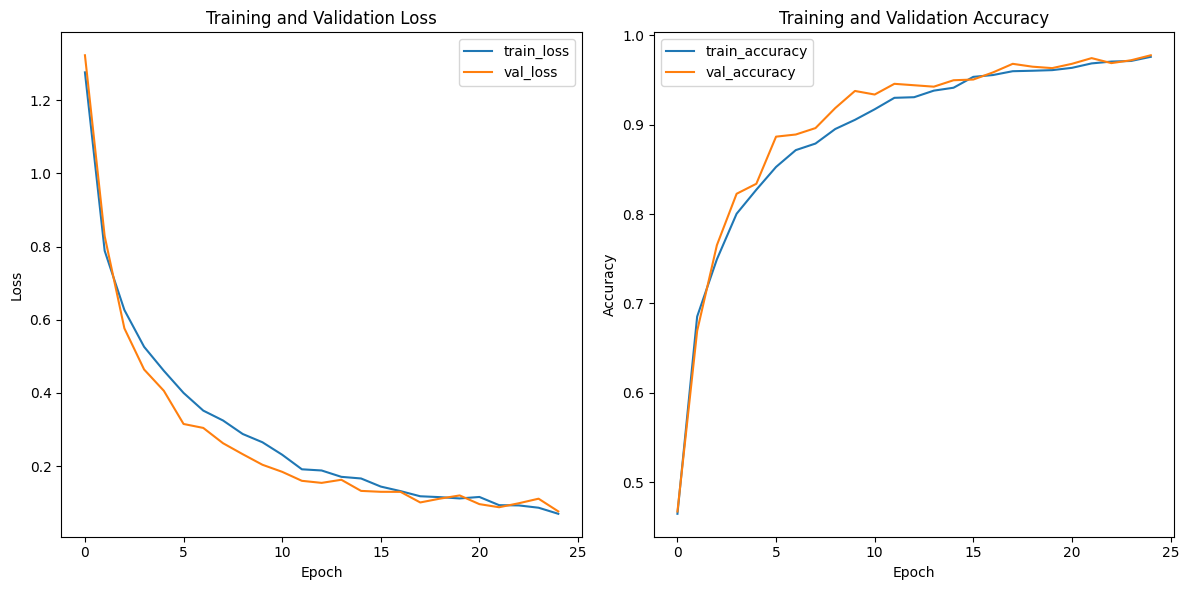

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd

# Define data folder and categories
data_folder = '/content/drive/MyDrive/data2_after_aug'
categories = ['Patient that have History of MI', 'Patient that have abnormal heart beats', 'COVID-19 Patients', 'Normal Person', 'Myocardial Infarction Patients']


# Define image parameters
image_size = (299, 299)  # Default size for InceptionV3
batch_size = 32

# Create DataFrame with file paths and corresponding labels
file_paths = []
labels = []
for i, category in enumerate(categories):
    category_folder = os.path.join(data_folder, category)
    category_files = [os.path.join(category_folder, file) for file in os.listdir(category_folder)]
    file_paths.extend(category_files)
    labels.extend([i] * len(category_files))

data_df = pd.DataFrame({'File_Path': file_paths, 'Label': labels})

# Convert integer labels to string labels
data_df['Label'] = data_df['Label'].astype(str)

# Split data into train, validation, and test sets
train_df, test_val_df = train_test_split(data_df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(test_val_df, test_size=0.5, random_state=42)  # 0.5 x 0.3 = 0.15 for validation and test each

# Data generators with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='File_Path',
    y_col='Label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = datagen.flow_from_dataframe(
    val_df,
    x_col='File_Path',
    y_col='Label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = datagen.flow_from_dataframe(
    test_df,
    x_col='File_Path',
    y_col='Label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the InceptionV3 pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Add custom classification layers with dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting
predictions = Dense(len(categories), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot training history including loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
model.save("/content/drive/MyDrive/trained_model5_inceptionv3old.h5")


In [ ]:

from sklearn.externals import joblib
joblib.dump(knn, 'my_model_knn.pkl')
from sklearn.externals import joblib
joblib.dump(knn, 'my_model_knn.pkl')


40/40 [==============================] - 34s 848ms/step


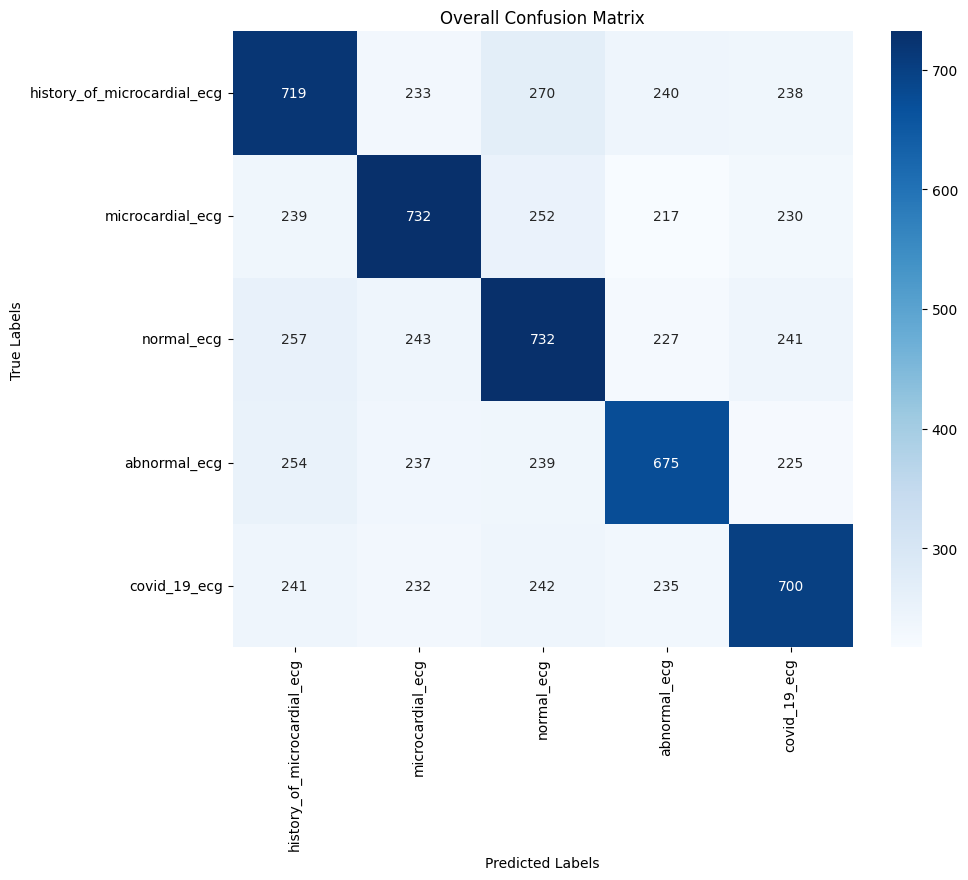

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels for train, validation, and test data
train_predictions = model.predict(train_generator).argmax(axis=-1)
val_predictions = model.predict(validation_generator).argmax(axis=-1)
test_predictions = model.predict(test_generator).argmax(axis=-1)

# Get true labels for train, validation, and test data
train_true_labels = train_generator.labels
val_true_labels = validation_generator.labels
test_true_labels = test_generator.labels

# Create confusion matrices
train_conf_matrix = confusion_matrix(train_true_labels, train_predictions)
val_conf_matrix = confusion_matrix(val_true_labels, val_predictions)
test_conf_matrix = confusion_matrix(test_true_labels, test_predictions)

# Sum the confusion matrices
overall_conf_matrix = train_conf_matrix + val_conf_matrix + test_conf_matrix

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(overall_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Overall Confusion Matrix')
plt.show()

40/40 [==============================] - 36s 895ms/step


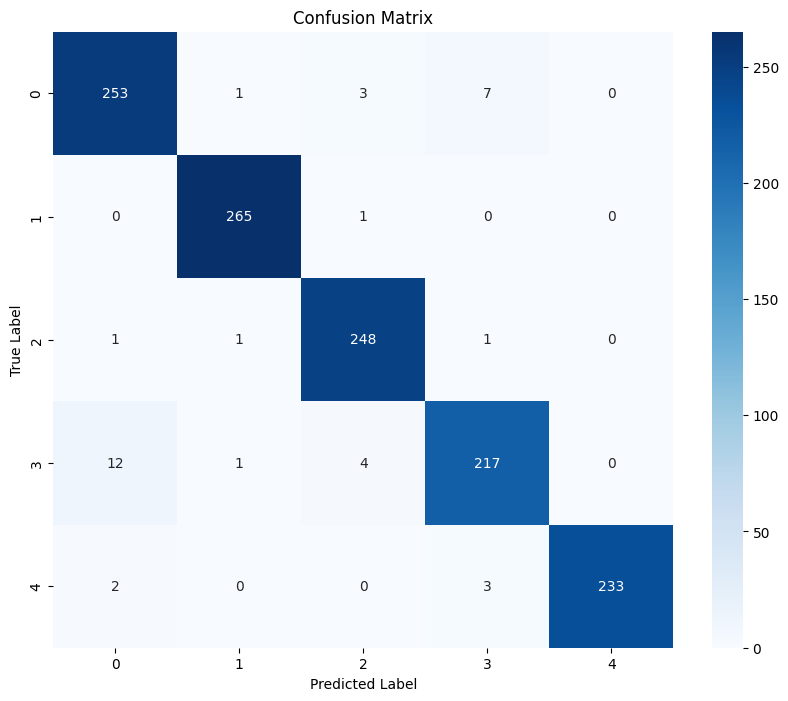

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       264
           1       0.99      1.00      0.99       266
           2       0.97      0.99      0.98       251
           3       0.95      0.93      0.94       234
           4       1.00      0.98      0.99       238

    accuracy                           0.97      1253
   macro avg       0.97      0.97      0.97      1253
weighted avg       0.97      0.97      0.97      1253



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test set
test_generator.reset()  # Reset the generator before prediction
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Create the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Display the classification report for more detailed performance metrics
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

40/40 [==============================] - 37s 894ms/step


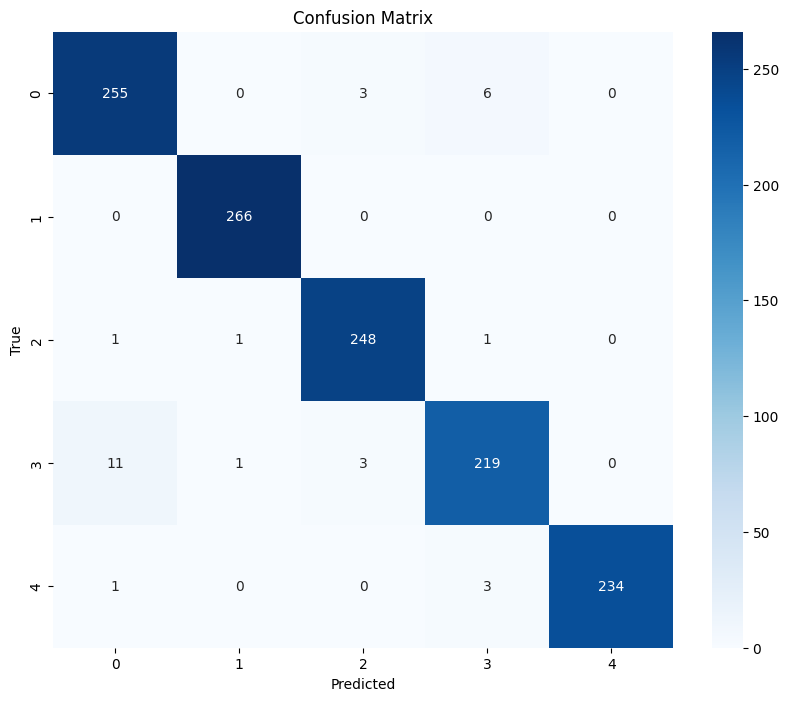

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       264
           1       0.99      1.00      1.00       266
           2       0.98      0.99      0.98       251
           3       0.96      0.94      0.95       234
           4       1.00      0.98      0.99       238

    accuracy                           0.98      1253
   macro avg       0.98      0.97      0.97      1253
weighted avg       0.98      0.98      0.98      1253



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Step 2: Generate predictions on the test data
test_generator.reset()  # Reset the generator
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Step 3: Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Optionally, print the classification report for more detailed metrics
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


40/40 [==============================] - 36s 896ms/step


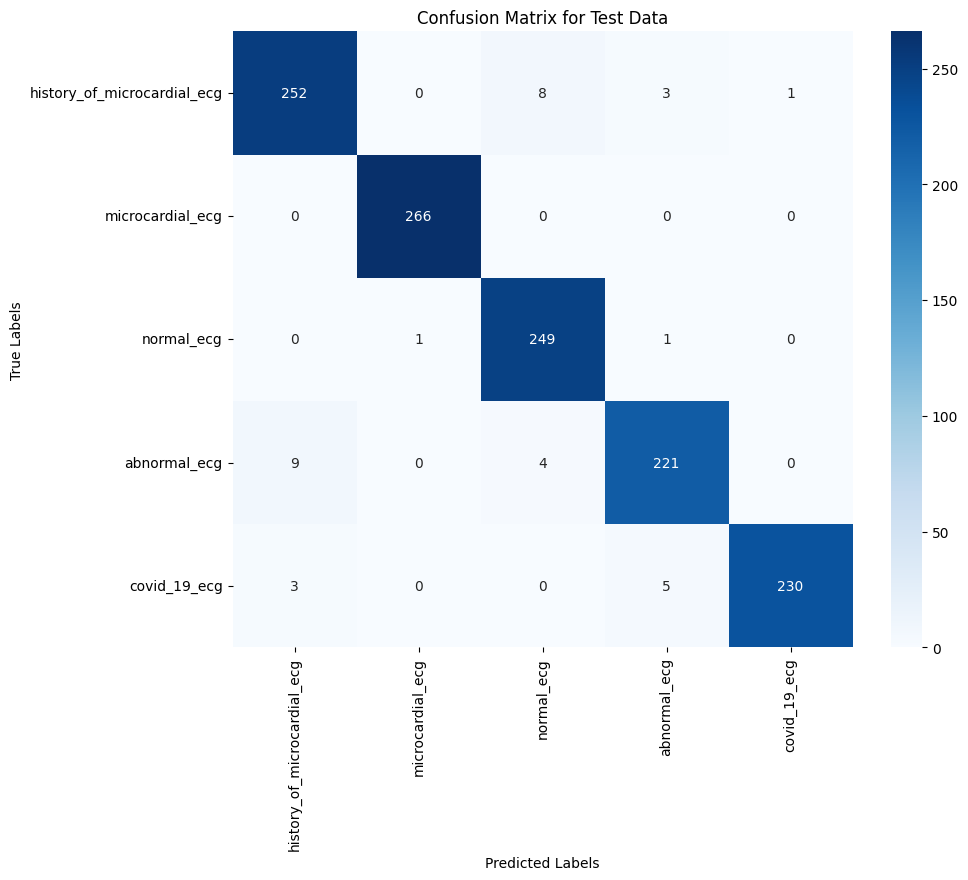

Classification Report for Test Data:
                             precision    recall  f1-score   support

history_of_microcardial_ecg       0.95      0.95      0.95       264
           microcardial_ecg       1.00      1.00      1.00       266
                 normal_ecg       0.95      0.99      0.97       251
               abnormal_ecg       0.96      0.94      0.95       234
               covid_19_ecg       1.00      0.97      0.98       238

                   accuracy                           0.97      1253
                  macro avg       0.97      0.97      0.97      1253
               weighted avg       0.97      0.97      0.97      1253



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for test data
test_generator.reset()  # Reset the generator
test_predictions = model.predict(test_generator).argmax(axis=-1)

# Get true labels for test data
test_true_labels = test_generator.labels

# Create confusion matrix for test data
test_conf_matrix = confusion_matrix(test_true_labels, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Data')
plt.show()

# Optionally, print the classification report for more detailed metrics
from sklearn.metrics import classification_report
print("Classification Report for Test Data:")
print(classification_report(test_true_labels, test_predictions, target_names=categories))


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
from tensorflow.keras.models import load_model
import cv2

# Load the saved model
loaded_model = load_model("/content/drive/MyDrive/trained_model5_inceptionv3old.h5")

# Define cropping dimensions
top_crop = 250  # pixels from the top
bottom_crop = 100  # pixels from the bottom

# Define image size
image_size = (299, 299)

# Read the image
new_photo_path = "/content/Binder1_Page_002.jpg"

img = cv2.imread(new_photo_path)

# Check if the image is loaded successfully
if img is not None:
    # Crop the image
    cropped_img = img[top_crop:-bottom_crop, :]

    # Apply bilateral filter to remove noise
    img_filtered = cv2.bilateralFilter(cropped_img, d=9, sigmaColor=75, sigmaSpace=75)

    # Define the lower and upper bounds for white color
    lower_white = np.array([50, 50, 50], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask to identify white areas in the image
    mask = cv2.inRange(img_filtered, lower_white, upper_white)

    # Morphological operation to remove small white points
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

    # Invert the mask
    mask = cv2.bitwise_not(mask)

    # Create a white background image
    bk = np.full(cropped_img.shape, 255, dtype=np.uint8)

    # Apply the mask to the foreground image
    fg_masked = cv2.bitwise_and(cropped_img, cropped_img, mask=mask)

    # Invert the mask again
    mask = cv2.bitwise_not(mask)

    # Apply the mask to the background image
    bk_masked = cv2.bitwise_and(bk, bk, mask=mask)

    # Combine the foreground and background images
    final = cv2.bitwise_or(fg_masked, bk_masked)

    # Resize the preprocessed image to match the model input size
    resized_photo = cv2.resize(final, image_size)

    # Normalize pixel values
    normalized_photo = resized_photo / 255.0

    # Make prediction
    prediction = loaded_model.predict(np.expand_dims(normalized_photo, axis=0))

    # Define categories
    categories = ['history_of_microcardial_ecg', 'microcardial_ecg', 'normal_ecg', 'abnormal_ecg', 'covid_19_ecg']
    # Get the predicted category
    predicted_category = categories[np.argmax(prediction)]
    print("Predicted Category:", predicted_category)


else:
    print("Error: Failed to load the image.")

1/1 [==============================] - 3s 3s/step
Predicted Category: covid_19_ecg


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
from tensorflow.keras.models import load_model
import cv2

# Load the saved model
loaded_model = load_model("/content/drive/MyDrive/trained_model5_inceptionv3old.h5")

# Define cropping dimensions
top_crop = 250  # pixels from the top
bottom_crop = 100  # pixels from the bottom

# Define image size
image_size = (299, 299)

# Read the image
new_photo_path = "/content/PMI(7).jpg"

img = cv2.imread(new_photo_path)

# Check if the image is loaded successfully
if img is not None:
    # Crop the image
    cropped_img = img[top_crop:-bottom_crop, :]

    # Apply bilateral filter to remove noise
    img_filtered = cv2.bilateralFilter(cropped_img, d=9, sigmaColor=75, sigmaSpace=75)

    # Define the lower and upper bounds for white color
    lower_white = np.array([50, 50, 50], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask to identify white areas in the image
    mask = cv2.inRange(img_filtered, lower_white, upper_white)

    # Morphological operation to remove small white points
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

    # Invert the mask
    mask = cv2.bitwise_not(mask)

    # Create a white background image
    bk = np.full(cropped_img.shape, 255, dtype=np.uint8)

    # Apply the mask to the foreground image
    fg_masked = cv2.bitwise_and(cropped_img, cropped_img, mask=mask)

    # Invert the mask again
    mask = cv2.bitwise_not(mask)

    # Apply the mask to the background image
    bk_masked = cv2.bitwise_and(bk, bk, mask=mask)

    # Combine the foreground and background images
    final = cv2.bitwise_or(fg_masked, bk_masked)

    # Resize the preprocessed image to match the model input size
    resized_photo = cv2.resize(final, image_size)

    # Normalize pixel values
    normalized_photo = resized_photo / 255.0

    # Make prediction
    prediction = loaded_model.predict(np.expand_dims(normalized_photo, axis=0))

    # Define categories
    categories = ['history_of_microcardial_ecg', 'microcardial_ecg', 'normal_ecg', 'abnormal_ecg', 'covid_19_ecg']
    # Get the predicted category
    predicted_category = categories[np.argmax(prediction)]
    print("Predicted Category:", predicted_category)


else:
    print("Error: Failed to load the image.")

1/1 [==============================] - 2s 2s/step
Predicted Category: normal_ecg


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
from tensorflow.keras.models import load_model
import cv2

# Load the saved model
loaded_model = load_model("/content/drive/MyDrive/trained_model5_inceptionv3old.h5")

# Define cropping dimensions
top_crop = 250  # pixels from the top
bottom_crop = 100  # pixels from the bottom

# Define image size
image_size = (299, 299)

# Read the image
new_photo_path = "/content/HB(6).jpg"

img = cv2.imread(new_photo_path)

# Check if the image is loaded successfully
if img is not None:
    # Crop the image
    cropped_img = img[top_crop:-bottom_crop, :]

    # Apply bilateral filter to remove noise
    img_filtered = cv2.bilateralFilter(cropped_img, d=9, sigmaColor=75, sigmaSpace=75)

    # Define the lower and upper bounds for white color
    lower_white = np.array([50, 50, 50], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask to identify white areas in the image
    mask = cv2.inRange(img_filtered, lower_white, upper_white)

    # Morphological operation to remove small white points
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

    # Invert the mask
    mask = cv2.bitwise_not(mask)

    # Create a white background image
    bk = np.full(cropped_img.shape, 255, dtype=np.uint8)

    # Apply the mask to the foreground image
    fg_masked = cv2.bitwise_and(cropped_img, cropped_img, mask=mask)

    # Invert the mask again
    mask = cv2.bitwise_not(mask)

    # Apply the mask to the background image
    bk_masked = cv2.bitwise_and(bk, bk, mask=mask)

    # Combine the foreground and background images
    final = cv2.bitwise_or(fg_masked, bk_masked)

    # Resize the preprocessed image to match the model input size
    resized_photo = cv2.resize(final, image_size)

    # Normalize pixel values
    normalized_photo = resized_photo / 255.0

    # Make prediction
    prediction = loaded_model.predict(np.expand_dims(normalized_photo, axis=0))

    # Define categories
    categories = ['history_of_microcardial_ecg', 'microcardial_ecg', 'normal_ecg', 'abnormal_ecg', 'covid_19_ecg']
    # Get the predicted category
    predicted_category = categories[np.argmax(prediction)]
    print("Predicted Category:", predicted_category)


else:
    print("Error: Failed to load the image.")

1/1 [==============================] - 4s 4s/step
Predicted Category: abnormal_ecg


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
from tensorflow.keras.models import load_model
import cv2

# Load the saved model
loaded_model = load_model("/content/drive/MyDrive/trained_model5_inceptionv3old.h5")

# Define cropping dimensions
top_crop = 250  # pixels from the top
bottom_crop = 100  # pixels from the bottom

# Define image size
image_size = (299, 299)

# Read the image
new_photo_path = "/content/PMI(8).jpg"

img = cv2.imread(new_photo_path)

# Check if the image is loaded successfully
if img is not None:
    # Crop the image
    cropped_img = img[top_crop:-bottom_crop, :]

    # Apply bilateral filter to remove noise
    img_filtered = cv2.bilateralFilter(cropped_img, d=9, sigmaColor=75, sigmaSpace=75)

    # Define the lower and upper bounds for white color
    lower_white = np.array([50, 50, 50], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask to identify white areas in the image
    mask = cv2.inRange(img_filtered, lower_white, upper_white)

    # Morphological operation to remove small white points
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

    # Invert the mask
    mask = cv2.bitwise_not(mask)

    # Create a white background image
    bk = np.full(cropped_img.shape, 255, dtype=np.uint8)

    # Apply the mask to the foreground image
    fg_masked = cv2.bitwise_and(cropped_img, cropped_img, mask=mask)

    # Invert the mask again
    mask = cv2.bitwise_not(mask)

    # Apply the mask to the background image
    bk_masked = cv2.bitwise_and(bk, bk, mask=mask)

    # Combine the foreground and background images
    final = cv2.bitwise_or(fg_masked, bk_masked)

    # Resize the preprocessed image to match the model input size
    resized_photo = cv2.resize(final, image_size)

    # Normalize pixel values
    normalized_photo = resized_photo / 255.0

    # Make prediction
    prediction = loaded_model.predict(np.expand_dims(normalized_photo, axis=0))

    # Define categories
    categories = ['history_of_microcardial_ecg', 'microcardial_ecg', 'normal_ecg', 'abnormal_ecg', 'covid_19_ecg']
    # Get the predicted category
    predicted_category = categories[np.argmax(prediction)]
    print("Predicted Category:", predicted_category)


else:
    print("Error: Failed to load the image.")

1/1 [==============================] - 2s 2s/step
Predicted Category: history_of_microcardial_ecg


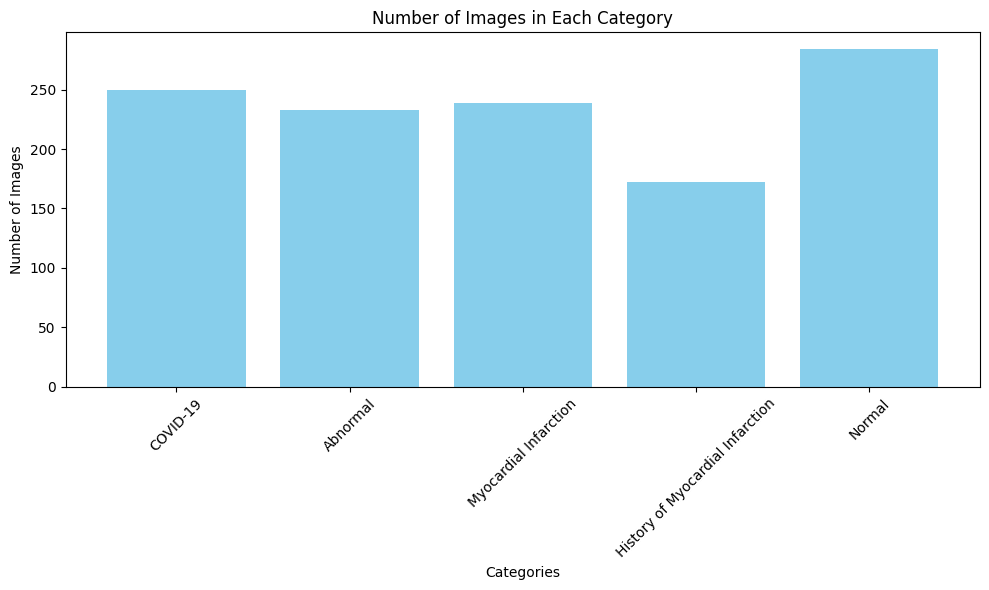

In [ ]:
import matplotlib.pyplot as plt

# Image counts for each category
categories = ['COVID-19', 'Abnormal', 'Myocardial Infarction', 'History of Myocardial Infarction', 'Normal']
image_counts = [250, 233, 239, 172, 284]

# Create histogram
plt.figure(figsize=(10, 6))
plt.bar(categories, image_counts, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd
import joblib

# Define data folder and categories
data_folder = '/content/drive/MyDrive/data2_after_aug'
categories = ['Patient that have History of MI', 'Patient that have abnormal heart beats', 'COVID-19 Patients', 'Normal Person', 'Myocardial Infarction Patients']

# Define image parameters
image_size = (299, 299)  # Default size for InceptionV3
batch_size = 32

# Create DataFrame with file paths and corresponding labels
file_paths = []
labels = []
for i, category in enumerate(categories):
    category_folder = os.path.join(data_folder, category)
    category_files = [os.path.join(category_folder, file) for file in os.listdir(category_folder)]
    file_paths.extend(category_files)
    labels.extend([i] * len(category_files))

data_df = pd.DataFrame({'File_Path': file_paths, 'Label': labels})

# Convert integer labels to string labels
data_df['Label'] = data_df['Label'].astype(str)

# Split data into train, validation, and test sets
train_df, test_val_df = train_test_split(data_df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(test_val_df, test_size=0.5, random_state=42)  # 0.5 x 0.3 = 0.15 for validation and test each

# Data generators with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='File_Path',
    y_col='Label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = datagen.flow_from_dataframe(
    val_df,
    x_col='File_Path',
    y_col='Label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = datagen.flow_from_dataframe(
    test_df,
    x_col='File_Path',
    y_col='Label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the InceptionV3 pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Add custom classification layers with dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting
predictions = Dense(len(categories), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Save the model architecture to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights using joblib
joblib.dump(model.get_weights(), "/content/drive/MyDrive/model_weights.pkl")

# Save training history
joblib.dump(history.history, "/content/drive/MyDrive/training_history.pkl")

# Plot training history including loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Found 5845 validated image filenames belonging to 5 classes.
Found 1252 validated image filenames belonging to 5 classes.
Found 1253 validated image filenames belonging to 5 classes.
87910968/87910968 [==============================] - 5s 0us/step
Epoch 1/25
183/183 [==============================] - ETA: 0s - loss: 1.2501 - accuracy: 0.4823 

In [ ]:
from tensorflow.keras.models import model_from_json
import joblib

# Load the model architecture from JSON
with open("/content/drive/MyDrive/model_architecture.json", "r") as json_file:
    model_json = json_file.read()

model = model_from_json(model_json)

# Load the model weights using joblib
model.set_weights(joblib.load("/content/drive/MyDrive/model_weights.pkl"))

# Compile the model (necessary because we saved only the architecture and weights)
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Optionally, load the training history if needed
history = joblib.load("/content/drive/MyDrive/training_history.pkl")
